# part2 resume w adding terms -------------->

# adding interaction & squared terms for better results in LR

In [3]:
import pandas as pd

In [4]:
#extract x&y
train_data = pd.read_csv('train_data.csv')
X_train_selected = train_data.drop(columns=['y1_train', 'y2_train'])
y1_train = train_data['y1_train']
y2_train = train_data['y2_train']

val_data = pd.read_csv('val_data.csv')
X_val_selected = val_data.drop(columns=['y1_val', 'y2_val'])
y1_val = val_data['y1_val']
y2_val = val_data['y2_val']

test_data = pd.read_csv('test_data.csv')
X_test_selected = test_data.drop(columns=['y1_test', 'y2_test'])
y1_test = test_data['y1_test']
y2_test = test_data['y2_test']

In [16]:
X_train_selected
# X_val_selected
# X_test_selected
# y2_train
# y2_val
# y2_test

,"Ice vol mean radius, Mean (um)",Total contrail EF (J),"Temp initial, Mean (K)","Tau cirrus, Mean","Ice number initial, Mean (m-1)",RF LW (W m-2),RF SW (W m-2),"RHi initial, Mean",Mean nvPM number EI (kg-1),"Tau contrail, Mean"
0,8.104943,-9.803122e+13,211.988027,0.059461,8.171083e+11,1.274654,-2.136018,0.965391,9.737014e+14,0.032228
1,11.396851,6.526151e+14,214.539888,0.230156,4.825063e+12,2.709673,-0.462785,1.077596,1.409608e+15,0.086032
2,1.174947,-6.665474e+11,206.463294,0.017427,4.640423e+12,0.447756,-0.318402,0.934291,1.517921e+15,0.045242
3,5.127562,6.506736e+13,210.716904,0.024615,2.980002e+12,1.514753,-1.687507,1.118627,5.143456e+14,0.046715
4,14.515607,1.870152e+13,223.596470,0.348228,3.710018e+12,4.307649,-2.705854,1.201717,5.576476e+14,0.222517
...,...,...,...,...,...,...,...,...,...,...
213655,6.287990,-5.848262e+13,205.665296,0.037373,4.442903e+12,3.004852,-3.928538,1.026555,3.800872e+14,0.035124
213656,13.782106,2.838121e+14,220.456859,0.151028,2.869579e+12,9.203848,-4.468458,1.199525,5.534915e+14,0.267492
213657,6.192778,4.031556e+14,208.486587,0.128156,4.726921e+12,2.685974,-1.603496,1.024720,1.132473e+15,0.066817
213658,0.448273,0.000000e+00,215.152319,0.000000,2.826432e+12,0.879319,-7.044063,0.865739,1.249643e+15,0.081751


In [6]:
#extract top 10 features from part1
X_train_selected_lr =X_train_selected.copy()
X_val_selected_lr = X_val_selected.copy()
X_test_selected_lr = X_test_selected.copy()

top_features = X_train_selected_lr.columns
top_features

Index(['Ice vol mean radius, Mean (um)', 'Total contrail EF (J)',
       'Temp initial, Mean (K)', 'Tau cirrus, Mean',
       'Ice number initial, Mean (m-1)', 'RF LW (W m-2)', 'RF SW (W m-2)',
       'RHi initial, Mean', 'Mean nvPM number EI (kg-1)',
       'Tau contrail, Mean'],
      dtype='object')

In [7]:
#X input for LR - add iteraction & squared terms to address heteroscadasticity & non-linearity in LR 

#add interaction terms for top 10 features
for i, featureA in enumerate(top_features):
    for j, featureB in enumerate(top_features):
        if i < j:
            name = f"{featureA}_x_{featureB}"
            X_train_selected_lr[name] = X_train_selected_lr[featureA] * X_train_selected_lr[featureB]
            X_val_selected_lr[name] = X_val_selected_lr[featureA] * X_val_selected_lr[featureB]
            X_test_selected_lr[name] = X_test_selected_lr[featureA] * X_test_selected_lr[featureB]

#add squared terms for top 10 features
for feature in top_features:
    name = f"{feature}^2"
    X_train_selected_lr[name] = X_train_selected_lr[feature] ** 2
    X_val_selected_lr[name] = X_val_selected_lr[feature] ** 2
    X_test_selected_lr[name] = X_test_selected_lr[feature] ** 2

In [10]:
X_train_selected_lr

,"Ice vol mean radius, Mean (um)",Total contrail EF (J),"Temp initial, Mean (K)","Tau cirrus, Mean","Ice number initial, Mean (m-1)",RF LW (W m-2),RF SW (W m-2),"RHi initial, Mean",Mean nvPM number EI (kg-1),"Tau contrail, Mean",...,"Ice vol mean radius, Mean (um)^2",Total contrail EF (J)^2,"Temp initial, Mean (K)^2","Tau cirrus, Mean^2","Ice number initial, Mean (m-1)^2",RF LW (W m-2)^2,RF SW (W m-2)^2,"RHi initial, Mean^2",Mean nvPM number EI (kg-1)^2,"Tau contrail, Mean^2"
0,8.104943,-9.803122e+13,211.988027,0.059461,8.171083e+11,1.274654,-2.136018,0.965391,9.737014e+14,0.032228,...,65.690098,9.610120e+27,44938.923694,0.003536,6.676659e+23,1.624744,4.562573,0.931979,9.480945e+29,0.001039
1,11.396851,6.526151e+14,214.539888,0.230156,4.825063e+12,2.709673,-0.462785,1.077596,1.409608e+15,0.086032,...,129.888210,4.259064e+29,46027.363661,0.052972,2.328124e+25,7.342329,0.214170,1.161214,1.986995e+30,0.007402
2,1.174947,-6.665474e+11,206.463294,0.017427,4.640423e+12,0.447756,-0.318402,0.934291,1.517921e+15,0.045242,...,1.380502,4.442854e+23,42627.091854,0.000304,2.153352e+25,0.200485,0.101380,0.872900,2.304084e+30,0.002047
3,5.127562,6.506736e+13,210.716904,0.024615,2.980002e+12,1.514753,-1.687507,1.118627,5.143456e+14,0.046715,...,26.291895,4.233761e+27,44401.613593,0.000606,8.880411e+24,2.294476,2.847681,1.251325,2.645514e+29,0.002182
4,14.515607,1.870152e+13,223.596470,0.348228,3.710018e+12,4.307649,-2.705854,1.201717,5.576476e+14,0.222517,...,210.702857,3.497468e+26,49995.381413,0.121263,1.376424e+25,18.555836,7.321647,1.444123,3.109708e+29,0.049514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213655,6.287990,-5.848262e+13,205.665296,0.037373,4.442903e+12,3.004852,-3.928538,1.026555,3.800872e+14,0.035124,...,39.538822,3.420217e+27,42298.214106,0.001397,1.973939e+25,9.029133,15.433409,1.053815,1.444663e+29,0.001234
213656,13.782106,2.838121e+14,220.456859,0.151028,2.869579e+12,9.203848,-4.468458,1.199525,5.534915e+14,0.267492,...,189.946435,8.054931e+28,48601.226511,0.022809,8.234485e+24,84.710820,19.967120,1.438860,3.063528e+29,0.071552
213657,6.192778,4.031556e+14,208.486587,0.128156,4.726921e+12,2.685974,-1.603496,1.024720,1.132473e+15,0.066817,...,38.350504,1.625344e+29,43466.657040,0.016424,2.234378e+25,7.214457,2.571200,1.050050,1.282496e+30,0.004465
213658,0.448273,0.000000e+00,215.152319,0.000000,2.826432e+12,0.879319,-7.044063,0.865739,1.249643e+15,0.081751,...,0.200948,0.000000e+00,46290.520266,0.000000,7.988718e+24,0.773202,49.618823,0.749503,1.561608e+30,0.006683


# standardisation

In [11]:
#standardisation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#scaled wo added terms
X_train_scaled = scaler.fit_transform(X_train_selected)
X_val_scaled = scaler.transform(X_val_selected)
X_test_scaled = scaler.transform(X_test_selected)

#scaled w added terms (for LR)
X_train_scaled_lr = scaler.fit_transform(X_train_selected_lr)
X_val_scaled_lr = scaler.transform(X_val_selected_lr)
X_test_scaled_lr = scaler.transform(X_test_selected_lr)

# modelling - predict "Contrail age, Mean (h)" - y2

## 1. linear regression

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import mean_absolute_error

lr2 = LinearRegression()
lr2.fit(X_train_scaled_lr, y2_train)

In [108]:
#evaluate val
y2_pred_val_lr = lr2.predict(X_val_scaled_lr)
r2_val_lr = r2_score(y2_val, y2_pred_val_lr)
rmse_val_lr = np.sqrt(mean_squared_error(y2_val, y2_pred_val_lr))
mae_val_lr = mean_absolute_error(y2_val, y2_pred_val_lr)

print("Performance on Validation Data for 'Contrail age, Mean (h)':")
print(f"R2 Score: {r2_val_lr:.4f}")
print(f"Mean Squared Error: {rmse_val_lr:.4f}")
print(f"Mean Absolute Error: {mae_val_lr:.4f}")

#evaluate test
y2_pred_test_lr = lr2.predict(X_test_scaled_lr)
r2_test_lr = r2_score(y2_test, y2_pred_test_lr)
rmse_test_lr = np.sqrt(mean_squared_error(y2_test, y2_pred_test_lr))
mae_test_lr = mean_absolute_error(y2_test, y2_pred_test_lr)

print("\nPerformance on Test Data for 'Contrail age, Mean (h)':")
print(f"R2 Score: {r2_test_lr:.4f}")
print(f"Mean Squared Error: {rmse_test_lr:.4f}")
print(f"Mean Absolute Error: {mae_test_lr:.4f}")

Performance on Validation Data for 'Contrail age, Mean (h)':
R2 Score: 0.7229
Mean Squared Error: 1.0574
Mean Absolute Error: 0.7673

Performance on Test Data for 'Contrail age, Mean (h)':
R2 Score: 0.7293
Mean Squared Error: 1.0485
Mean Absolute Error: 0.7661


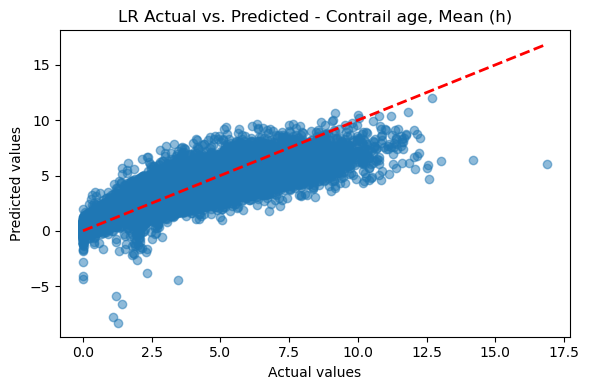

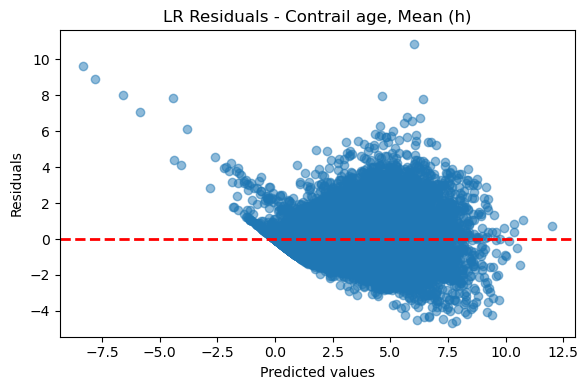

In [113]:
# 1. scatterplot of Actual vs. Predicted values
plt.figure(figsize=(6, 4))

# #'Persistent contrail length (km)'
# plt.subplot(1, 2, 1)
# plt.scatter(y1_val, y1_pred, alpha=0.5)
# plt.plot([min(y1_val), max(y1_val)], [min(y1_val), max(y1_val)], '--', lw=2, color='red')
# plt.title("Actual vs. Predicted - Persistent contrail length (km)")
# plt.xlabel("Actual values")
# plt.ylabel("Predicted values")

#'Contrail age, Mean (h)'
plt.subplot(1, 1, 1)
plt.scatter(y2_test, y2_pred_test_lr, alpha=0.5)
plt.plot([min(y2_test), max(y2_test)], [min(y2_test), max(y2_test)], '--', lw=2, color='red')
plt.title("LR Actual vs. Predicted - Contrail age, Mean (h)")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

plt.tight_layout()
plt.show()

# 2. residualplots
plt.figure(figsize=(6, 4))

# #'Persistent contrail length (km)'
# plt.subplot(1, 2, 1)
# residuals1 = y1_val - y1_pred
# plt.scatter(y1_pred, residuals1, alpha=0.5)
# plt.axhline(0, color='red', linestyle='--', lw=2)
# plt.title("Residuals - Persistent contrail length (km)")
# plt.xlabel("Predicted values")
# plt.ylabel("Residuals")

#'Contrail age, Mean (h)'
plt.subplot(1, 1, 1)
residuals2_lr = y2_test - y2_pred_test_lr
plt.scatter(y2_pred_test_lr, residuals2_lr, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title("LR Residuals - Contrail age, Mean (h)")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()

## 2. random forest

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#'Contrail age, Mean (h)' - y2 wo added terms - takes 30mins!!!!
rf2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf2.fit(X_train_scaled, y2_train) #- takes 30mins!!!!

In [110]:
from sklearn.metrics import mean_absolute_error

#evaluate val
y2_pred_val_rf = rf2.predict(X_val_scaled)
r2_val_rf = r2_score(y2_val, y2_pred_val_rf)
rmse_val_rf = np.sqrt(mean_squared_error(y2_val, y2_pred_val_rf))
mae_val_rf = mean_absolute_error(y2_val, y2_pred_val_rf)

print("Performance on Validation Data for 'Contrail age, Mean (h)':")
print(f"R2 Score: {r2_val_rf:.4f}")
print(f"Mean Squared Error: {rmse_val_rf:.4f}")
print(f"Mean Absolute Error: {mae_val_rf:.4f}")

#evaluate test
y2_pred_test_rf = rf2.predict(X_test_scaled)
r2_test_rf = r2_score(y2_test, y2_pred_test_rf)
rmse_test_rf = np.sqrt(mean_squared_error(y2_test, y2_pred_test_rf))
mae_test_rf = mean_absolute_error(y2_test, y2_pred_test_rf)

print("\nPerformance on Test Data for 'Contrail age, Mean (h)':")
print(f"R2 Score: {r2_test_rf:.4f}")
print(f"Mean Squared Error: {rmse_test_rf:.4f}")
print(f"Mean Absolute Error: {mae_test_rf:.4f}")

Performance on Validation Data for 'Contrail age, Mean (h)':
R2 Score: 0.7941
Mean Squared Error: 0.9114
Mean Absolute Error: 0.6443

Performance on Test Data for 'Contrail age, Mean (h)':
R2 Score: 0.8002
Mean Squared Error: 0.9006
Mean Absolute Error: 0.6380


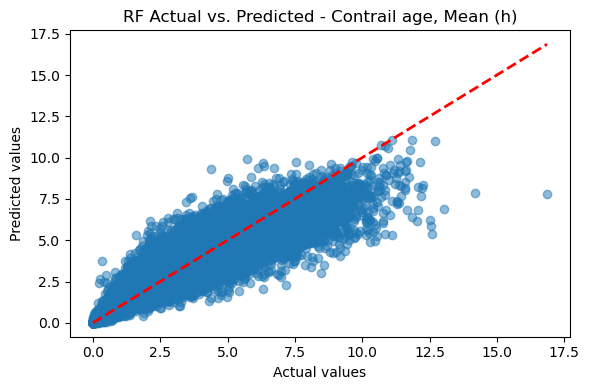

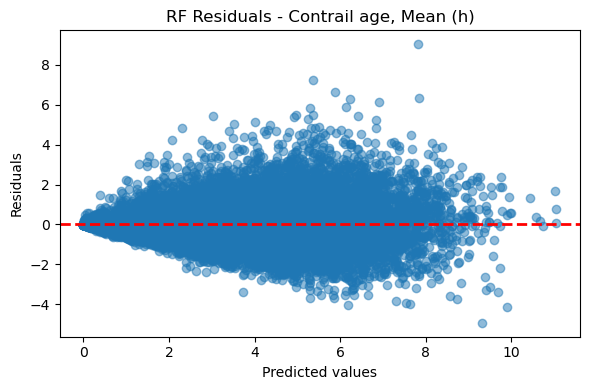

In [112]:
# 1. scatterplots of actual vs. predicted values - w added terms
plt.figure(figsize=(6, 4))

# # For 'Persistent contrail length (km)'
# plt.subplot(1, 2, 1)
# plt.scatter(y1_val, y1_pred_rf, alpha=0.5)
# plt.plot([min(y1_val), max(y1_val)], [min(y1_val), max(y1_val)], '--', lw=2, color='red')
# plt.title("RF Actual vs. Predicted - Persistent contrail length (km)")
# plt.xlabel("Actual values")
# plt.ylabel("Predicted values")

# For 'Contrail age, Mean (h)'
plt.subplot(1, 1, 1)
plt.scatter(y2_test, y2_pred_test_rf, alpha=0.5)
plt.plot([min(y2_test), max(y2_test)], [min(y2_test), max(y2_test)], '--', lw=2, color='red')
plt.title("RF Actual vs. Predicted - Contrail age, Mean (h)")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

plt.tight_layout()
plt.show()

# 2. residualplots
plt.figure(figsize=(6, 4))

# # For 'Persistent contrail length (km)'
# plt.subplot(1, 2, 1)
# residuals1_rf = y1_val - y1_pred_rf
# plt.scatter(y1_pred_rf, residuals1_rf, alpha=0.5)
# plt.axhline(0, color='red', linestyle='--', lw=2)
# plt.title("RF Residuals - Persistent contrail length (km)")
# plt.xlabel("Predicted values")
# plt.ylabel("Residuals")

# For 'Contrail age, Mean (h)'
plt.subplot(1, 1, 1)
residuals2_rf = y2_test - y2_pred_test_rf
plt.scatter(y2_pred_test_rf, residuals2_rf, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title("RF Residuals - Contrail age, Mean (h)")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()

## 3. xgboost

In [29]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/63/ca/37b83f59b0efd919c03c52ad7e2473dced674f2f6eb07b9d6f7d80e4c54c/xgboost-2.0.2-py3-none-manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 3.3 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


### approach0 - GBT wo Log-Transform with Squared Error Objective

In [114]:
#Gradient boosting improved over LR wo added terms - slightly BETTER results
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

#fit train data
xgb2 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb2.fit(X_train_scaled, y2_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [117]:
#evaluate val data 
y2_pred_val_xgb = xgb2.predict(X_val_scaled)
r2_val_xgb = r2_score(y2_val, y2_pred_val_xgb)
rmse_val_xgb = np.sqrt(mean_squared_error(y2_val, y2_pred_val_xgb))
mae_val_xgb = mean_absolute_error(y2_val, y2_pred_val_xgb)
print(f"XGBoost Validation Metrics for 'Contrail age, Mean (h)': RMSE = {rmse_val_xgb}, MAE = {mae_val_xgb}, R2 = {r2_val_xgb}")

#evaluate test data
y2_pred_test_xgb = xgb2.predict(X_test_scaled)
r2_test_xgb = r2_score(y2_test, y2_pred_test_xgb)
rmse_test_xgb = np.sqrt(mean_squared_error(y2_test, y2_pred_test_xgb))
mae_test_xgb = mean_absolute_error(y2_test, y2_pred_test_xgb)
print(f"XGBoost Test Metrics for 'Contrail age, Mean (h)': RMSE = {rmse_test_xgb}, MAE = {mae_test_xgb}, R2 = {r2_test_xgb}")

XGBoost Validation Metrics for 'Contrail age, Mean (h)': RMSE = 0.9198778055220668, MAE = 0.6546613281104603, R2 = 0.7902992802401699
XGBoost Test Metrics for 'Contrail age, Mean (h)': RMSE = 0.9096731754643895, MAE = 0.6476294191674242, R2 = 0.7962154861145181


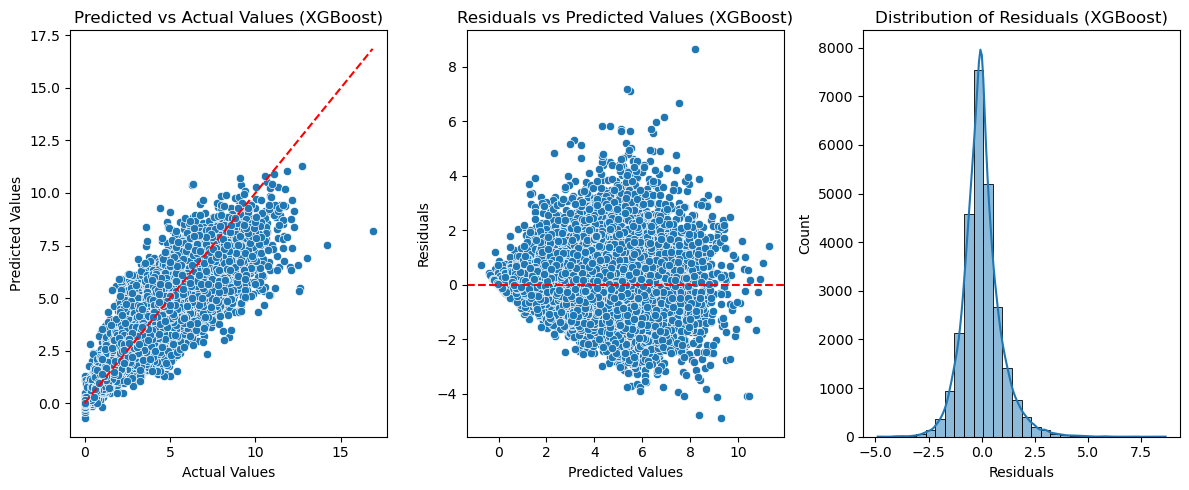

In [128]:
import seaborn as sns
plt.figure(figsize=(12, 5))

#predicted vs actual
plt.subplot(1, 3, 1)
sns.scatterplot(x=y2_test, y=y2_pred_test_xgb)
plt.plot([min(y2_test), max(y2_test)], [min(y2_test), max(y2_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (XGBoost)')

#residuals vs predicted
plt.subplot(1, 3, 2)
residuals2_xgb = y2_test - y2_pred_test_xgb
sns.scatterplot(x=y2_pred_test_xgb, y=residuals2_xgb)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (XGBoost)')

#residual dist
plt.subplot(1, 3, 3)
sns.histplot(residuals2_xgb, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals (XGBoost)')

plt.tight_layout()
plt.show()

#### https://arxiv.org/abs/1708.00130v1 <- predict session length
#### https://arxiv.org/abs/1803.01440v2
#### https://xgboost.readthedocs.io/en/stable/python/examples/gamma_regression.html
#### https://xgboost.readthedocs.io/en/stable/parameter.html

### approach1 - GBT w Log-Transform with Squared Error Objective

In [125]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# log-transform target variable
y2_train_log = np.log1p(y2_train)  # Adding 1 to avoid log(0)
y2_val_log = np.log1p(y2_val)
y2_test_log = np.log1p(y2_test)

# create DMatrix for XGBoost
dtrain_log = xgb.DMatrix(X_train_scaled, label=y2_train_log)
dval_log = xgb.DMatrix(X_val_scaled, label=y2_val_log)
dtest_log = xgb.DMatrix(X_test_scaled, label=y2_test_log)

# define parameters for XGBoost
params_log = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

# train
bst_log2 = xgb.train(params_log, dtrain_log, num_boost_round=30, evals=[(dval_log, 'eval')])

# predict & back-transform predictions
y2_pred_val_log = np.expm1(bst_log2.predict(dval_log))
y2_pred_test_log = np.expm1(bst_log2.predict(dtest_log))

# evaluate val
rmse_val_log = np.sqrt(mean_squared_error(y2_val, y2_pred_val_log))
mae_val_log = mean_absolute_error(y2_val, y2_pred_val_log)
r2_val_log = r2_score(y2_val, y2_pred_val_log)

# evaluate test
rmse_test_log = np.sqrt(mean_squared_error(y2_test, y2_pred_test_log))
mae_test_log = mean_absolute_error(y2_test, y2_pred_test_log)
r2_test_log = r2_score(y2_test, y2_pred_test_log)

print(f"Log-transformed Model Validation Metrics: RMSE = {rmse_val_log}, MAE = {mae_val_log}, R2 = {r2_val_log}")
print(f"Log-transformed Model Test Metrics: RMSE = {rmse_test_log}, MAE = {mae_test_log}, R2 = {r2_test_log}")
#xgb w log-transformation < xgb wo log-transformation

[0]	eval-rmse:0.40311
[1]	eval-rmse:0.33066
[2]	eval-rmse:0.28436
[3]	eval-rmse:0.25305
[4]	eval-rmse:0.23398
[5]	eval-rmse:0.22175
[6]	eval-rmse:0.21393
[7]	eval-rmse:0.20843
[8]	eval-rmse:0.20498
[9]	eval-rmse:0.20195
[10]	eval-rmse:0.20027
[11]	eval-rmse:0.19820
[12]	eval-rmse:0.19695
[13]	eval-rmse:0.19582
[14]	eval-rmse:0.19479
[15]	eval-rmse:0.19406
[16]	eval-rmse:0.19320
[17]	eval-rmse:0.19260
[18]	eval-rmse:0.19191
[19]	eval-rmse:0.19151
[20]	eval-rmse:0.19106
[21]	eval-rmse:0.19069
[22]	eval-rmse:0.19034
[23]	eval-rmse:0.19001
[24]	eval-rmse:0.18975
[25]	eval-rmse:0.18947
[26]	eval-rmse:0.18912
[27]	eval-rmse:0.18882
[28]	eval-rmse:0.18841
[29]	eval-rmse:0.18824
Log-transformed Model Validation Metrics: RMSE = 0.9491008941951505, MAE = 0.6681147333609165, R2 = 0.7767639109939027
Log-transformed Model Test Metrics: RMSE = 0.9418909817942536, MAE = 0.6629955492751929, R2 = 0.781525034990237


### approach2 - GBT w Gamma Distribution with Log Link Function

In [131]:
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# initialize MinMaxScaler
scaler = MinMaxScaler()

# convert pd.series to np.array
def convert_series_to_array(data):
    if isinstance(data, pd.Series):
        return data.values.reshape(-1, 1)
    return data.reshape(-1, 1)

# add small constant to ensure target variables are strictly +ve
epsilon = 1e-6
y2_train += epsilon
y2_val += epsilon
y2_test += epsilon

# fit & transform on train -> transform on val/test
y2_train_scaled = scaler.fit_transform(convert_series_to_array(y2_train)).flatten()
y2_val_scaled = scaler.transform(convert_series_to_array(y2_val)).flatten()
y2_test_scaled = scaler.transform(convert_series_to_array(y2_test)).flatten()

# ensure no scaled values are zero (in case of very small original values)
y2_train_scaled = np.clip(y2_train_scaled, epsilon, None)
y2_val_scaled = np.clip(y2_val_scaled, epsilon, None)
y2_test_scaled = np.clip(y2_test_scaled, epsilon, None)

# create DMatrix for xgb
dtrain_gamma = xgb.DMatrix(X_train_scaled, label=y2_train_scaled)
dval_gamma = xgb.DMatrix(X_val_scaled, label=y2_val_scaled)
dtest_gamma = xgb.DMatrix(X_test_scaled, label=y2_test_scaled)

# define parameters
params_gamma = {
    'objective': 'reg:gamma',  #link function is natural log 
    'eval_metric': 'gamma-deviance',
    'max_depth': 20,
    'min_child_weight': 3,
    'subsample': 0.9,  
    'eta': 0.3,  
    'gamma': 0.3, 
    'nthread': -1,
}

# train 
bst_gamma2 = xgb.train(params_gamma, dtrain_gamma, num_boost_round=30, evals=[(dval_gamma, 'eval')])

# predict & scale back to original scale
y2_pred_val_unscaled = bst_gamma2.predict(dval_gamma)
y2_pred_test_unscaled = bst_gamma2.predict(dtest_gamma)
y2_pred_val_gamma = scaler.inverse_transform(y2_pred_val_unscaled.reshape(-1, 1)).flatten()
y2_pred_test_gamma = scaler.inverse_transform(y2_pred_test_unscaled.reshape(-1, 1)).flatten()

# evaluate val 
rmse_val_gamma = np.sqrt(mean_squared_error(y2_val, y2_pred_val_gamma))
mae_val_gamma = mean_absolute_error(y2_val, y2_pred_val_gamma)
r2_val_gamma = r2_score(y2_val, y2_pred_val_gamma)

# evaluate test
rmse_test_gamma = np.sqrt(mean_squared_error(y2_test, y2_pred_test_gamma))
mae_test_gamma = mean_absolute_error(y2_test, y2_pred_test_gamma)
r2_test_gamma = r2_score(y2_test, y2_pred_test_gamma)

print(f"Gamma Model Validation Metrics: RMSE = {rmse_val_gamma}, MAE = {mae_val_gamma}, R2 = {r2_val_gamma}")
print(f"Gamma Model Test Metrics: RMSE = {rmse_test_gamma}, MAE = {mae_test_gamma}, R2 = {r2_test_gamma}")

[0]	eval-gamma-deviance:18.69723
[1]	eval-gamma-deviance:14.54761
[2]	eval-gamma-deviance:11.50860
[3]	eval-gamma-deviance:9.30820
[4]	eval-gamma-deviance:7.85509
[5]	eval-gamma-deviance:6.72297
[6]	eval-gamma-deviance:5.93422
[7]	eval-gamma-deviance:5.39183
[8]	eval-gamma-deviance:5.02165
[9]	eval-gamma-deviance:4.77106
[10]	eval-gamma-deviance:4.60560
[11]	eval-gamma-deviance:4.49534
[12]	eval-gamma-deviance:4.42664
[13]	eval-gamma-deviance:4.37852
[14]	eval-gamma-deviance:4.34764
[15]	eval-gamma-deviance:4.32345
[16]	eval-gamma-deviance:4.31413
[17]	eval-gamma-deviance:4.29735
[18]	eval-gamma-deviance:4.28480
[19]	eval-gamma-deviance:4.26932
[20]	eval-gamma-deviance:4.25620
[21]	eval-gamma-deviance:4.24222
[22]	eval-gamma-deviance:4.22358
[23]	eval-gamma-deviance:4.20260
[24]	eval-gamma-deviance:4.17343
[25]	eval-gamma-deviance:4.13597
[26]	eval-gamma-deviance:4.08722
[27]	eval-gamma-deviance:4.02361
[28]	eval-gamma-deviance:3.94282
[29]	eval-gamma-deviance:3.83698
Gamma Model Valid

## 4. FFNN

In [33]:
!pip install keras 

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/fc/a7/0d4490de967a67f68a538cc9cdb259bff971c4b5787f7765dc7c8f118f71/keras-2.15.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.0 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [34]:
! pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e2/7a/c7762c698fb1ac41a7e3afee51dc72aa3ec74ae8d2f57ce19a9cded3a4af/tensorflow-2.14.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Obtaining dependency information for libclang>=13.0.0 from https://files.pythonhosted.org/packages/ea/df/55525e489c43f9dbb6c8ea27d8a567b3dcd18a22f3c45483055f5ca6611d/libclang-16.0.6-py2.py3-none-manylinux2010_x86_64.whl.metadata
  Obtaining dependency information for ml-dtypes==0.2.0 from https://files.pythonhosted.org/p

In [127]:
#FFNN w added terms

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress TensorFlow logging

from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_absolute_error

nn2 = Sequential()
nn2.add(Dense(128, input_dim=X_train_scaled_lr.shape[1], activation='relu'))  #w added terms
nn2.add(Dense(64, activation='relu'))
nn2.add(Dense(32, activation='relu'))
nn2.add(Dense(1, activation='linear'))

nn2.compile(loss='mean_squared_error', optimizer='adam')
nn2.fit(X_train_scaled_lr, y2_train, epochs=5, batch_size=10, validation_data=(X_val_scaled_lr, y2_val))  #evaluate on val

y2_pred_test_nn = nn2.predict(X_test_scaled_lr)  #predict on test 

r2_test_nn = r2_score(y2_test, y2_pred_test_nn)
rmse_test_nn = np.sqrt(mean_squared_error(y2_test, y2_pred_test_nn))
mae_test_nn = mean_absolute_error(y2_test, y2_pred_test_nn)
print(f"Neural Network Metrics for 'Contrail age, Mean (h)': RMSE = {rmse_test_nn}, MAE = {mae_test_nn}, R2 = {r2_test_nn}")  #on test data

Epoch 1/5
21366/21366 [==============================] - 22s 1ms/step - loss: 1.0293 - val_loss: 0.9362
Epoch 2/5
21366/21366 [==============================] - 22s 1ms/step - loss: 0.9169 - val_loss: 0.9209
Epoch 3/5
21366/21366 [==============================] - 22s 1ms/step - loss: 0.8943 - val_loss: 0.8862
Epoch 4/5
21366/21366 [==============================] - 22s 1ms/step - loss: 0.8812 - val_loss: 0.9001
Epoch 5/5
835/835 [==============================] - 1s 697us/step
Neural Network Metrics for 'Contrail age, Mean (h)': RMSE = 0.9251909267717631, MAE = 0.6638873541709087, R2 = 0.7892036284357327


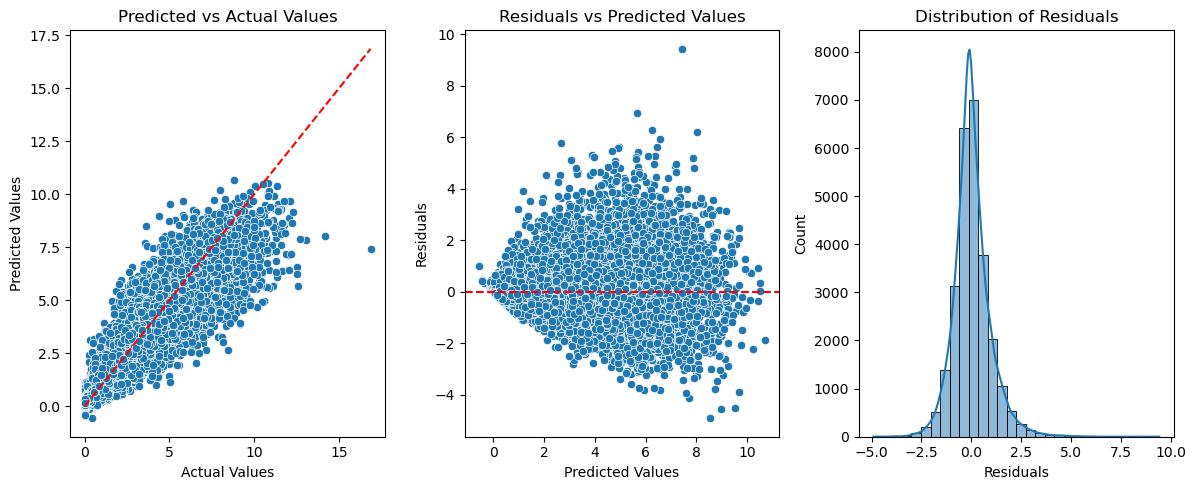

In [129]:
#evaluation - w added terms
import seaborn as sns

plt.figure(figsize=(12, 5))

#predicted vs actual
plt.subplot(1, 3, 1)
sns.scatterplot(x=y2_test, y=y2_pred_test_nn.ravel())
plt.plot([min(y2_test), max(y2_test)], [min(y2_test), max(y2_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')

#residuals vs predicted
plt.subplot(1, 3, 2)
residuals2_nn = y2_test - y2_pred_test_nn.ravel()
sns.scatterplot(x=y2_pred_test_nn.ravel(), y=residuals2_nn)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')

#residuals dist
plt.subplot(1, 3, 3)
sns.histplot(residuals2_nn, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()

## 5. gamma/weilbull

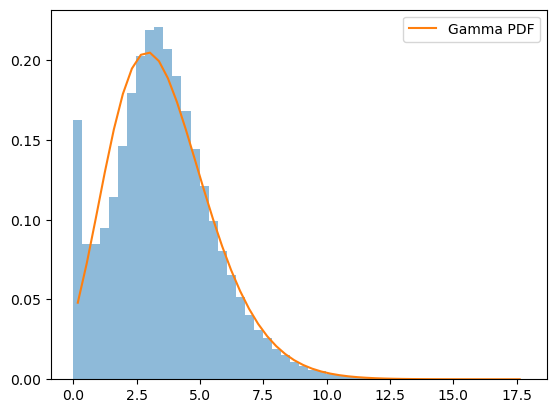

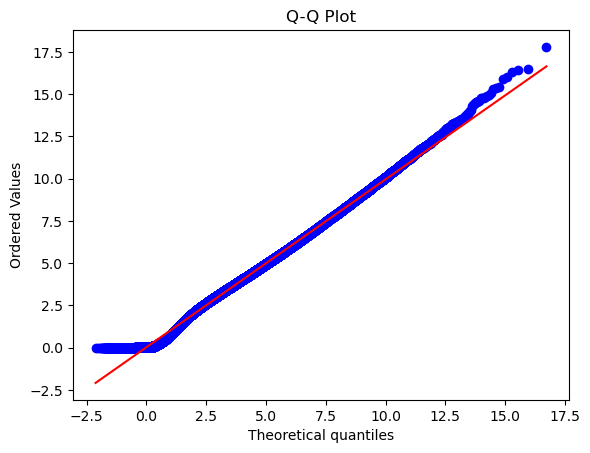

KS Statistic: 0.026169015674138082, P-value: 1.5274429799712392e-127


In [79]:
#assess if data follows gamma distribution

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Fit the data to a Gamma distribution
alpha_hat, loc_hat, beta_hat = stats.gamma.fit(y2_train)

# Histogram and PDF - If the histogram of the data resembles the plotted PDF of the fitted Gamma distribution ie data follow a Gamma distribution.
histogram, bins, _ = plt.hist(y2_train, bins=50, density=True, alpha=0.5)
bin_centers = 0.5*(bins[1:] + bins[:-1])
pdf = stats.gamma.pdf(bin_centers, alpha_hat, loc_hat, beta_hat)
plt.plot(bin_centers, pdf, label='Gamma PDF')
plt.legend()
plt.show()

# Q-Q Plot - If the points fall approximately along the reference line (y=x), then the data is consistent with a Gamma distribution.
fig, ax = plt.subplots(1, 1)
stats.probplot(y2_train, dist=stats.gamma, sparams=(alpha_hat, loc_hat, beta_hat), plot=ax)
ax.set_title('Q-Q Plot')
plt.show()

# Kolmogorov-Smirnov test (K-S Test) 
#A high p-value ie > 0.05 suggests that data does not significantly differ from the Gamma distribution
ks_stat, ks_p_value = stats.kstest(y2_train, 'gamma', args=(alpha_hat, loc_hat, beta_hat))
print(f'KS Statistic: {ks_stat}, P-value: {ks_p_value}')

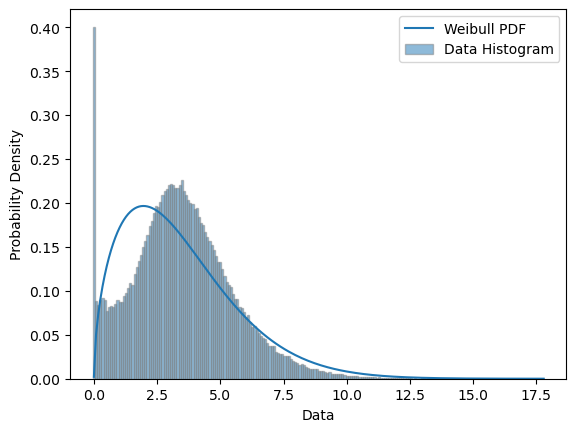

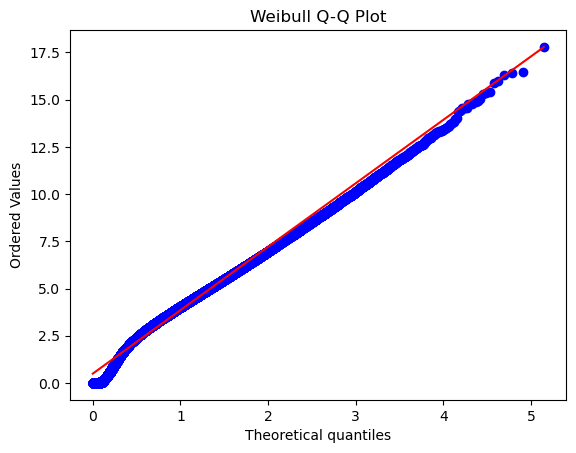

KS Statistic: 0.09433870337972305, P-value: 0.0


In [80]:
#assess if data follows weibull distribution

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Fit Weibull Distribution using MLE
shape, loc, scale = stats.weibull_min.fit(y2_train, floc=0)  #fix the location to zero

# Histogram with Weibull PDF - histogram resembles the plotted PDF of the fitted Weibull PDF -> weibull dist
hist_bins = np.histogram_bin_edges(y2_train, bins='auto')
hist_heights, _ = np.histogram(y2_train, bins=hist_bins, density=True)
plt.bar(hist_bins[:-1], hist_heights, width=np.diff(hist_bins), edgecolor='gray', alpha=0.5, label='Data Histogram')
weibull_pdf = stats.weibull_min.pdf(hist_bins, shape, loc, scale)
plt.plot(hist_bins, weibull_pdf, label='Weibull PDF')
plt.xlabel('Data')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# Weibull Q-Q Plot - data fall approximately along the reference line (y=x) -> weibull dist
fig = plt.figure()
ax = fig.add_subplot(111)
res = stats.probplot(y2_train, dist=stats.weibull_min, sparams=(shape,), plot=ax)
ax.set_title('Weibull Q-Q Plot')
plt.show()

# Goodness-of-Fit Test (K-S Test)
#A high p-value ie > 0.05 suggests NOT rejecting weibull dist
ks_stat, ks_p_value = stats.kstest(y2_train, 'weibull_min', args=(shape, loc, scale))
print(f'KS Statistic: {ks_stat}, P-value: {ks_p_value}')

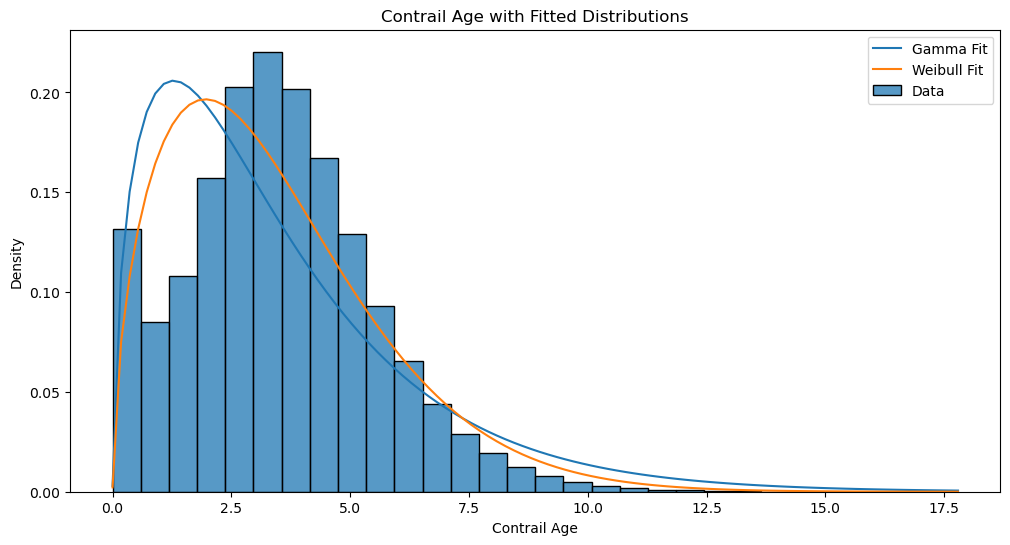

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma, weibull_min
import numpy as np

plt.figure(figsize=(12, 6))
sns.histplot(y2_train, kde=False, stat="density", bins=30, label='Data')

# Fit Gamma Distribution
params_gamma = gamma.fit(y2_train, floc=0)

# Fit Weibull Distribution
params_weibull = weibull_min.fit(y2_train, floc=0)

x = np.linspace(y2_train.min(), y2_train.max(), 100)

# PDFs for Fitted Distributions
pdf_gamma = gamma.pdf(x, *params_gamma)
pdf_weibull = weibull_min.pdf(x, *params_weibull)

plt.plot(x, pdf_gamma, label='Gamma Fit')
plt.plot(x, pdf_weibull, label='Weibull Fit')
plt.title('Contrail Age with Fitted Distributions')
plt.xlabel('Contrail Age')
plt.ylabel('Density')
plt.legend()
plt.show()

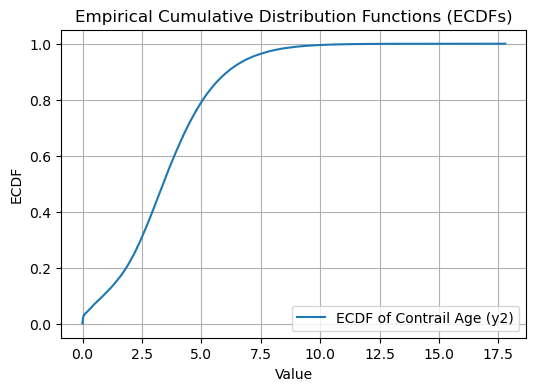

In [66]:
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt

ecdf_y2 = ECDF(y2_train)
x_y2 = np.linspace(min(y2_train), max(y2_train), len(y2_train))
y_ecdf_y2 = ecdf_y2(x_y2)

# Plot ECDFs
plt.figure(figsize=(6, 4))
plt.step(x_y2, y_ecdf_y2, label='ECDF of Contrail Age (y2)')

plt.xlabel('Value')
plt.ylabel('ECDF')
plt.title('Empirical Cumulative Distribution Functions (ECDFs)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
from scipy.stats import weibull_min

params_y2 = weibull_min.fit(y2_train, floc=0)  # fix location to zero
shape_y2, loc_y2, scale_y2 = params_y2

(shape_y2, scale_y2)  #shape parameter & scale parameter

(1.5483926929712302, 3.826939436334741)

### gamma regression

In [148]:
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Gamma
from statsmodels.genmod.families.links import log as log_link
from sklearn.metrics import mean_absolute_error

#add constant to the features
X_train_scaled_const = sm.add_constant(X_train_scaled)
X_val_scaled_const = sm.add_constant(X_val_scaled)
X_test_scaled_const = sm.add_constant(X_test_scaled)

#create & fit Gamma regression model with log link function
gamma_classifier2 = GLM(y2_train, X_train_scaled_const, family=Gamma(link=log_link()))
gamma2 = gamma_classifier2.fit()
print(gamma2.summary())

#evaluate val
y2_pred_val_gammareg = gamma2.predict(X_val_scaled_const)
r2_val_gammareg = r2_score(y2_val, y2_pred_val_gammareg)  #-ve
rmse_val_gammareg = np.sqrt(mean_squared_error(y2_val, y2_pred_val_gammareg))
mae_val_gammareg = mean_absolute_error(y2_val, y2_pred_val_gammareg)
print(f"Gamma Regression Validation Metrics: MSE = {rmse_val_gammareg}, MAE = {mae_val_gammareg}, R2 = {r2_val_gammareg}")

#evaluate test
y2_pred_test_gammareg = gamma2.predict(X_test_scaled_const)
r2_test_gammareg = r2_score(y2_test, y2_pred_test_gammareg)  #-ve
rmse_test_gammareg = np.sqrt(mean_squared_error(y2_test, y2_pred_test_gammareg))
mae_test_gammareg = mean_absolute_error(y2_test, y2_pred_test_gammareg)
print(f"Gamma Regression Test Metrics: MSE = {rmse_test_gammareg}, MAE = {mae_test_gammareg}, R2 = {r2_test_gammareg}")

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:               213660
Model:                            GLM   Df Residuals:                   213649
Model Family:                   Gamma   Df Model:                           10
Link Function:                    log   Scale:                         0.27082
Method:                          IRLS   Log-Likelihood:            -4.4554e+05
Date:                Thu, 16 Nov 2023   Deviance:                   1.0305e+05
Time:                        00:40:49   Pearson chi2:                 5.79e+04
No. Iterations:                    40   Pseudo R-squ. (CS):             0.5534
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1477      0.001   1019.412      0.0

### Weibull regression

In [ ]:
pip install lifelines

  Obtaining dependency information for lifelines from https://files.pythonhosted.org/packages/cc/95/35190b276a598b640e04e96bcee19362884835c01994db7323d443017e60/lifelines-0.27.8-py3-none-any.whl.metadata
  Obtaining dependency information for autograd>=1.5 from https://files.pythonhosted.org/packages/81/70/d5c7c2a458b8be96495c8b1634c2155beab58cbe864b7a9a5c06c2e52520/autograd-1.6.2-py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for formulaic>=0.2.2 from https://files.pythonhosted.org/packages/ae/f0/ff275c0009f0037c381c6e3a94049b9792df7d7f437c5ccd0c7aefca5f22/formulaic-0.6.6-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 6.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 1.1 MB/s eta 0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 1.7 MB/s eta 0:00:00eta 0:00:01
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-

In [135]:
import pandas as pd
from lifelines import WeibullAFTFitter

# create df for train
df_train = pd.DataFrame(X_train_scaled)
df_train['Contrail_age'] = y2_train

# fit weibull
weibull2 = WeibullAFTFitter()
weibull2.fit(df_train, duration_col='Contrail_age')

print(weibull2.summary)

                       coef  exp(coef)  se(coef)  coef lower 95%  \
param   covariate                                                  
lambda_ 0          0.469210   1.598731  0.002426        0.464454   
        1          0.068085   1.070456  0.001538        0.065071   
        2         -0.286224   0.751095  0.001951       -0.290047   
        3         -0.078425   0.924571  0.001929       -0.082206   
        4          0.103747   1.109320  0.001641        0.100531   
        5          0.225900   1.253450  0.002816        0.220380   
        6          0.011935   1.012007  0.001754        0.008498   
        7          0.123608   1.131572  0.001981        0.119726   
        8          0.054487   1.055999  0.001518        0.051513   
        9         -0.209497   0.810992  0.002451       -0.214302   
        Intercept  1.251080   3.494115  0.001157        1.248812   
rho_    Intercept  0.662647   1.939920  0.001806        0.659108   

                   coef upper 95%  exp(coef) lo

In [136]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# ensure columns of df_val_scaled and df_test_scaled match df_train
df_val_scaled = pd.DataFrame(X_val_scaled)
df_test_scaled = pd.DataFrame(X_test_scaled)
df_val_scaled.columns = df_train.columns.drop('Contrail_age')
df_test_scaled.columns = df_train.columns.drop('Contrail_age')

# predict
y2_pred_val_weibullreg = weibull2.predict_median(df_val_scaled)
y2_pred_test_weibullreg = weibull2.predict_median(df_test_scaled)

# evaluate val
rmse_val_weibullreg = np.sqrt(mean_squared_error(y2_val, y2_pred_val_weibullreg))
mae_val_weibullreg = mean_absolute_error(y2_val, y2_pred_val_weibullreg)
r2_val_weibullreg = r2_score(y2_test, y2_pred_val_weibullreg)  #-ve

# evaluate test
rmse_test_weibullreg = np.sqrt(mean_squared_error(y2_test, y2_pred_test_weibullreg))
mae_test_weibullreg = mean_absolute_error(y2_test, y2_pred_test_weibullreg)
r2_test_weibullreg = r2_score(y2_test, y2_pred_test_weibullreg)  #-ve

print(f"Validation RMSE: {rmse_val_weibullreg}, MAE: {mae_val_weibullreg}, R2 = {r2_val_weibullreg}")
print(f"Test RMSE: {rmse_test_weibullreg}, MAE: {mae_test_weibullreg}, R2 = {r2_test_weibullreg}")

Validation RMSE: 1.777483884880536, MAE: 1.218582394702746, R2 = -0.7693035213908905
Test RMSE: 1.8207375432055861, MAE: 1.227066226336497, R2 = 0.18361485114051712


## summary

In [149]:
max_length = max(len("lr"), len("rf"), len("xgb"), len("xgb_log"), len("xgb_gamma"), len("ffnn"), len("gammareg"), len("weibullreg"))

print('summary for contrail age: ')
print(f"{'lr'.ljust(max_length)}: {rmse_test_lr:.2f}, {mae_test_lr:.2f}, {r2_test_lr:.2f}")
print(f"{'rf'.ljust(max_length)}: {rmse_test_rf:.2f}, {mae_test_rf:.2f}, {r2_test_rf:.2f}")
print(f"{'xgb'.ljust(max_length)}: {rmse_test_xgb:.2f}, {mae_test_xgb:.2f}, {r2_test_xgb:.2f}")
print(f"{'xgb_log'.ljust(max_length)}: {rmse_test_log:.2f}, {mae_test_log:.2f}, {r2_test_log:.2f}")
print(f"{'xgb_gamma'.ljust(max_length)}: {rmse_test_gamma:.2f}, {mae_test_gamma:.2f}, {r2_test_gamma:.2f}")
print(f"{'ffnn'.ljust(max_length)}: {rmse_test_nn:.2f}, {mae_test_nn:.2f}, {r2_test_nn:.2f}")
print(f"{'gammareg'.ljust(max_length)}: {rmse_test_gammareg:.2f}, {mae_test_gammareg:.2f}, {r2_test_gammareg:.2f}")
print(f"{'weibullreg'.ljust(max_length)}: {rmse_test_weibullreg:.2f}, {mae_test_weibullreg:.2f}, {r2_test_weibullreg:.2f}")

summary for contrail age: 
lr        : 1.05, 0.77, 0.73
rf        : 0.90, 0.64, 0.80
xgb       : 0.91, 0.65, 0.80
xgb_log   : 0.94, 0.66, 0.78
xgb_gamma : 0.90, 0.64, 0.80
ffnn      : 0.93, 0.66, 0.79
gammareg  : 2.27, 1.35, -0.27
weibullreg: 1.82, 1.23, 0.18
